# Data Modelling

In [139]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor  
from xgboost import XGBClassifier 

In [114]:
train_data = pd.read_csv("train_preprocessed.csv")

In [115]:
test_data = pd.read_csv("test_preprocessed.csv")

In [116]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,week_day,week_day_num,month,pickup_hour,distance,speed_m_s,speed_km_hr
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,3,17,1.502172,3.301477,11.885316
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,6,0,1.808660,2.727994,9.820778
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,1,11,6.379687,3.003619,10.813029
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,2,4,19,1.483632,3.458351,12.450063
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,5,3,13,1.187038,2.728822,9.823760


In [117]:
train_data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
week_day               object
week_day_num            int64
month                   int64
pickup_hour             int64
distance              float64
speed_m_s             float64
speed_km_hr           float64
dtype: object

In [118]:
features = ['vendor_id', 'passenger_count', 'week_day_num', 'month', 'pickup_hour', 'distance', 'speed_m_s']
x = train_data[features]
y = train_data['trip_duration']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7294)

### Multiple Regression

In [119]:
start_time = time.time()
lm_regression = LinearRegression()
lm_regression = lm_regression.fit(x_train, y_train)
end_time = time.time()
lm_time = (end_time - start_time)
print(f"Time taken to train linear regression model : {lm_time} seconds")

Time taken to train linear regression model : 0.38329458236694336 seconds


In [120]:
trips = lm_regression.predict(x_test)
predictions = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': trips.flatten()})
predictions

,Actual,Predicted
0,1052,926.409299
1,1207,1207.376438
2,321,520.434507
3,322,667.333733
4,730,732.062164
...,...,...
283203,715,767.803695
283204,892,866.170931
283205,413,528.841017
283206,1919,1576.288825


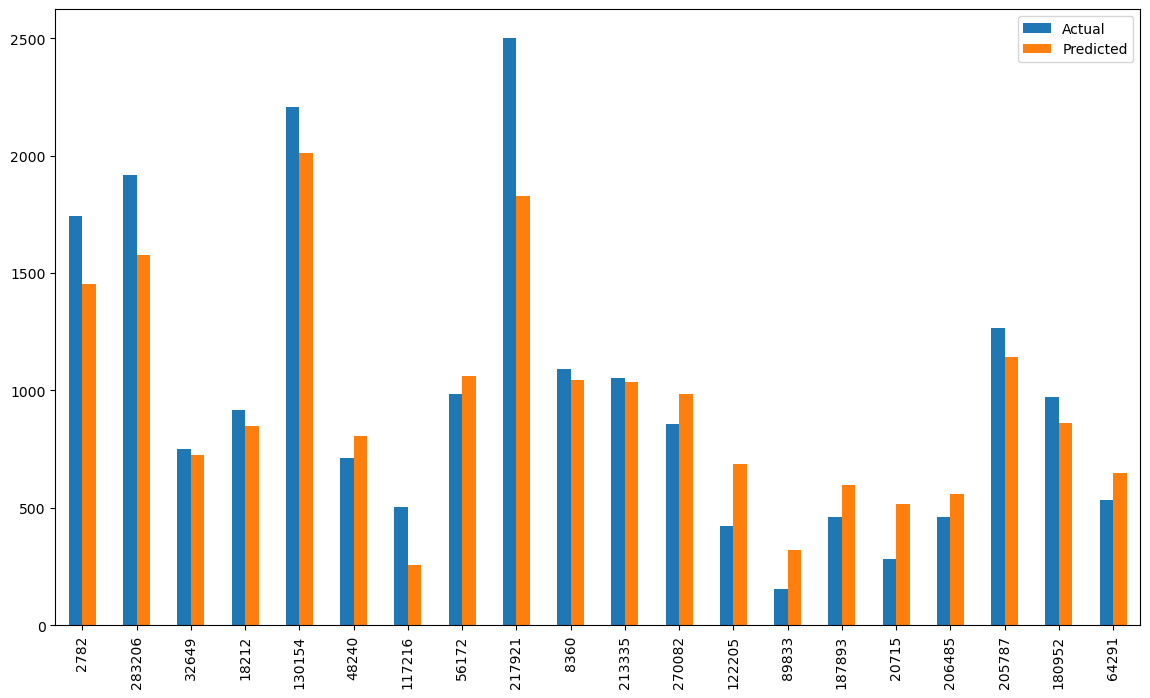

In [121]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.show()

In [122]:
lm_score = r2_score(y_test, trips)
print(lm_score)

0.7820769321362124


### Descision Tree 

In [123]:
start_time = time.time()
dt_regression = DecisionTreeRegressor()
dt_regression = dt_regression.fit(x_train, y_train)
end_time = time.time()
dt_time = (end_time - start_time)
print(f"Time taken to train Decision tree model : {dt_time} seconds")
trips = dt_regression.predict(x_test)
predictions = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': trips.flatten()})
predictions

Time taken to train Decision tree model : 14.582474708557129 seconds


,Actual,Predicted
0,1052,1051.0
1,1207,1209.0
2,321,321.0
3,322,320.0
4,730,729.0
...,...,...
283203,715,714.0
283204,892,891.0
283205,413,413.0
283206,1919,1922.0


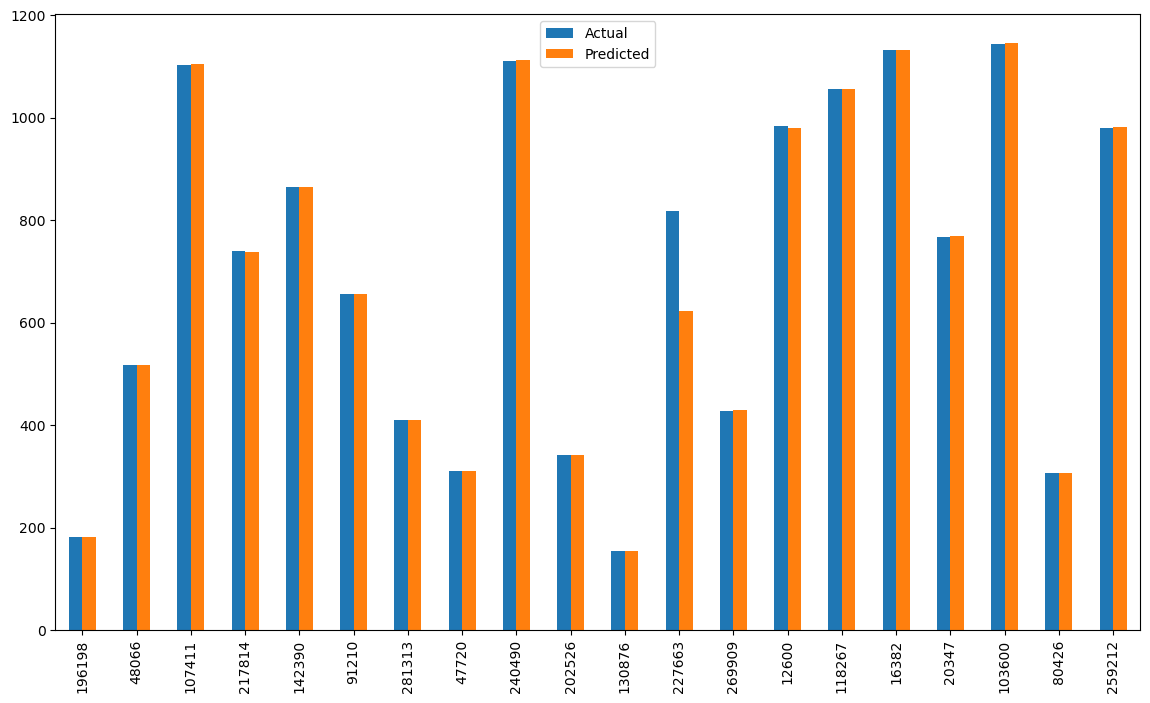

In [124]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.show()

In [125]:
dt_score = r2_score(y_test, trips)
print(dt_score)

0.9931072584176449


### Gradient Boost

In [147]:
start_time = time.time()
regression = GradientBoostingRegressor()
regression = regression.fit(x_train, y_train)
end_time = time.time()
gd_time = (end_time - start_time)
print(f"Time taken to train Gradient Boost model : {gd_time} seconds")
trips = regression.predict(x_test)
predictions = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': trips.flatten()})
predictions

Time taken to train Gradient Boost model : 341.8115427494049 seconds


,Actual,Predicted
0,1052,1069.457790
1,1207,1186.469860
2,321,316.403708
3,322,386.566393
4,730,720.287189
...,...,...
283203,715,728.903017
283204,892,855.678421
283205,413,413.857169
283206,1919,1854.868284


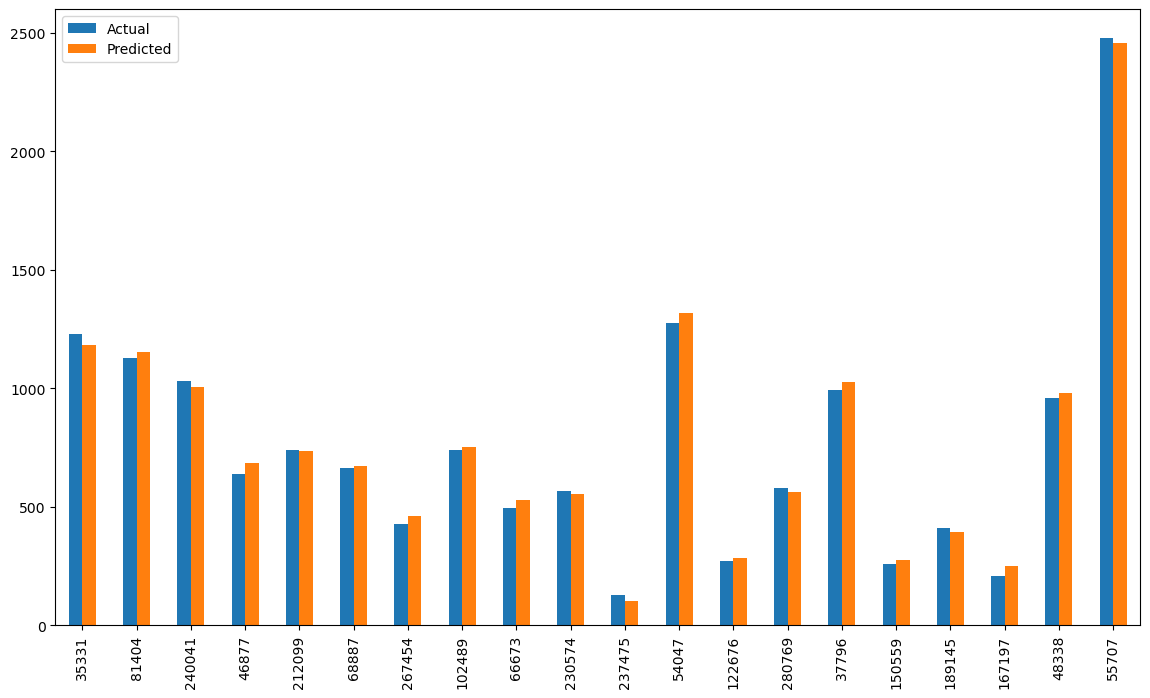

In [148]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.show()

In [149]:
gd_score = r2_score(y_test, trips)
print(gd_score)

0.9861719142174477


### XG Boost

In [134]:
start_time = time.time()
regression = XGBRegressor(objective ='reg:squarederror')
regression = regression.fit(x_train, y_train)
end_time = time.time()
xgb_time = (end_time - start_time)
print(f"Time taken to train XGBoost  model : {xgb_time} seconds")
trips = regression.predict(x_test)
predictions = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': trips.flatten()})

Time taken to train XGBoost  model : 77.82859373092651 seconds


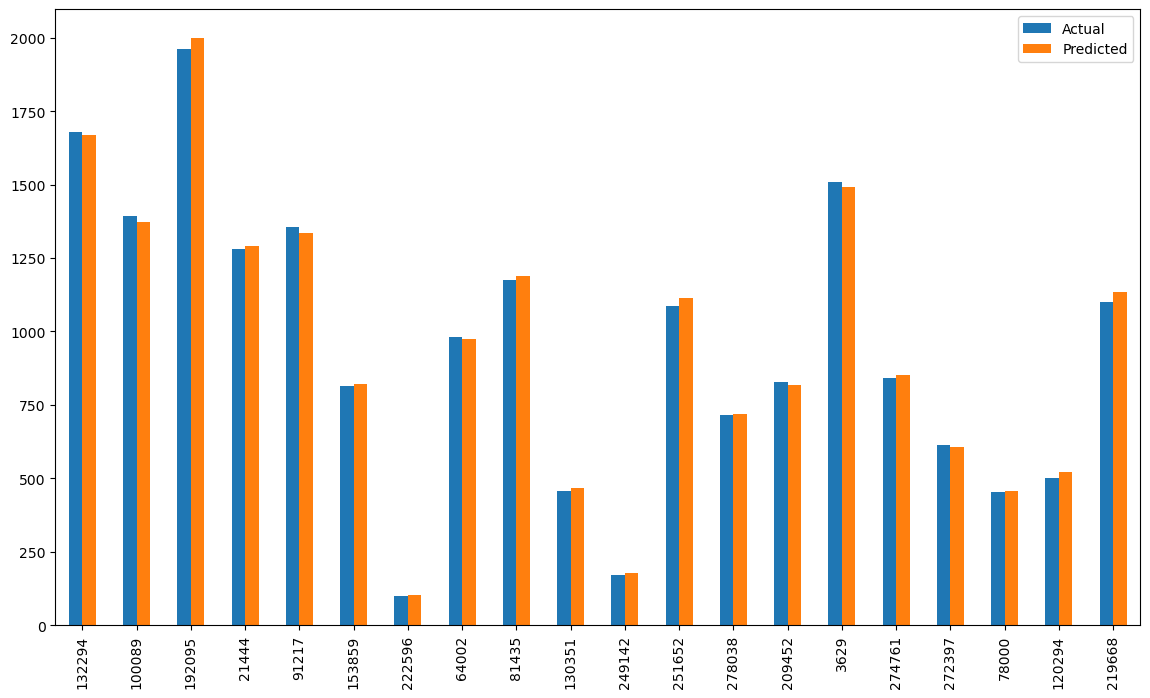

In [135]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.show()

In [136]:
xgb_score = r2_score(y_test, trips)
print(xgb_score)

0.9953883245761678


### Random Forest

In [141]:
start_time = time.time()
rf_regression = RandomForestRegressor()
rf_regression = rf_regression.fit(x_train, y_train)
end_time = time.time()
rf_time = (end_time - start_time)
print(f"Time taken to train Random Forest model : {rf_time} seconds")
trips = rf_regression.predict(x_test)
predictions = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': trips.flatten()})
predictions

Time taken to train Random Forest model : 1041.3370015621185 seconds


,Actual,Predicted
0,1052,1051.18
1,1207,1208.56
2,321,321.13
3,322,320.87
4,730,729.62
...,...,...
283203,715,714.39
283204,892,891.55
283205,413,413.07
283206,1919,1919.80


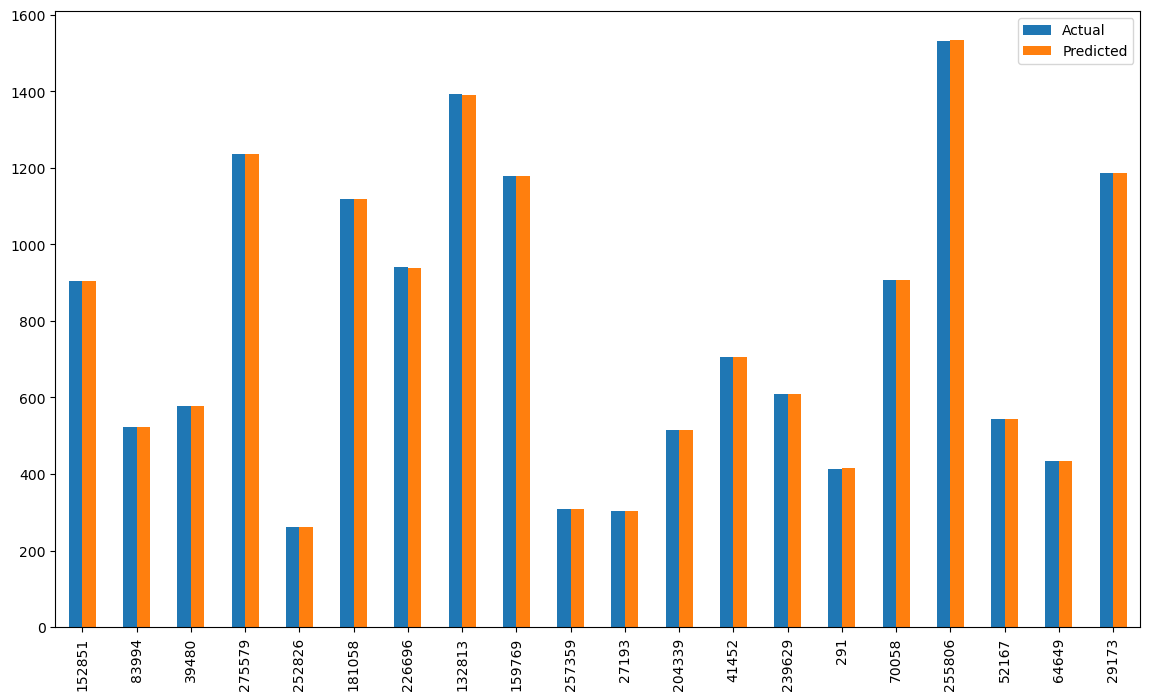

In [146]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.show()

In [144]:
rf_score = r2_score(y_test, trips)
print(rf_score)

0.9950334651209664


### Comparison

In [152]:
r2 = [lm_score, dt_score, rf_score, gd_score, xgb_score]
tm = [lm_time, dt_time, rf_time, gd_time, xgb_time]
comparison = pd.DataFrame({'Time': tm, 'Accuracy': r2})
comparison.head()

,Time,Accuracy
0,0.383295,0.782077
1,14.582475,0.986172
2,1041.337002,0.995033
3,341.811543,0.986172
4,77.828594,0.995388


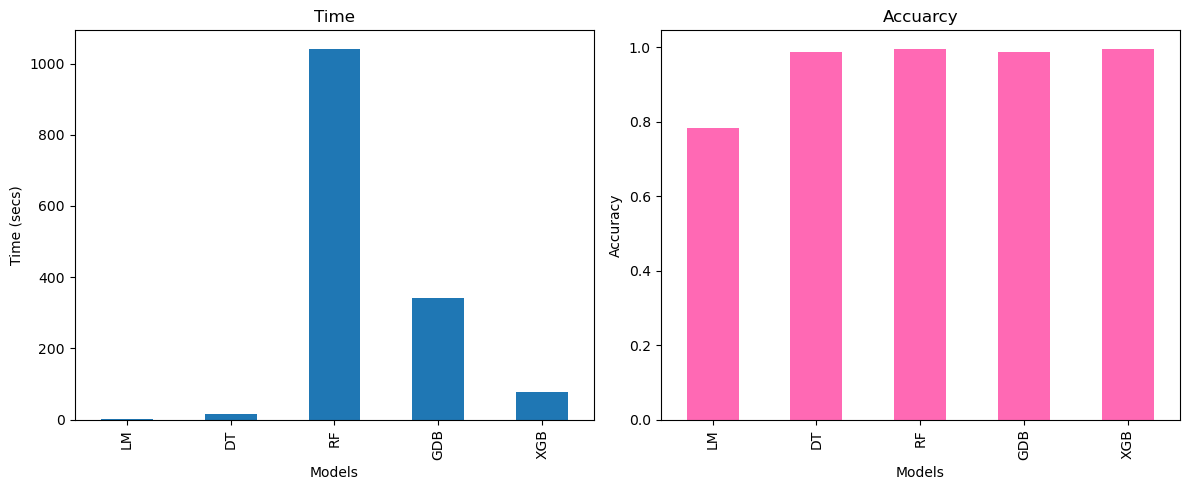

In [156]:
label = ['LM', 'DT', 'RF', 'GDB', 'XGB']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = comparison['Time'].plot(kind='bar',title="Time",ax=axes[0])
ax1 = comparison['Accuracy'].plot(kind='bar',title="Accuarcy",ax=axes[1], color = "hotpink")
ax.set_ylabel("Time (secs)")
ax.set_xlabel('Models')
ax.set_xticklabels(label)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel('Models')
ax1.set_xticklabels(label)
fig.tight_layout()

### Predicting

In [160]:
features = ['vendor_id', 'passenger_count', 'pickup_hour', 'week_day_num', 'month', 'distance']

X_train = train_data[features]
y_train = train_data['trip_duration']

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

X_test = test_data[features]
y_pred = dt_model.predict(X_test)

test_data['predicted_trip_duration'] = y_pred

In [161]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,week_day,week_day_num,month,pickup_hour,distance,predicted_trip_duration
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,Thursday,3,6,23,2.742863,403.0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,Thursday,3,6,23,2.755774,539.0
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,Thursday,3,6,23,1.307112,275.0
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,Thursday,3,6,23,5.266978,796.0
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,Thursday,3,6,23,0.961745,352.0
